# 🔎 Exploratory Data Analysis (EDA)

## 📝 Introducción

El Análisis Exploratorio de Datos (EDA) es un paso fundamental en cualquier proyecto de ciencia de datos, ya que nos permite comprender mejor la estructura, las relaciones y los patrones presentes en los datos antes de realizar cualquier modelado o análisis avanzado.

En este proyecto, trabajaremos con dos conjuntos de datos principales:

1. **💓 Cardio Train Dataset**: Este conjunto de datos contiene información sobre diferentes indicadores de salud de personas, como edad, género, altura, peso, presión arterial, colesterol, entre otros. El objetivo es explorar estos datos para identificar posibles correlaciones y patrones que puedan ser útiles para predecir enfermedades cardiovasculares.

2. **🕊️ Cause of Deaths Dataset**: Este conjunto de datos proporciona información sobre las principales causas de muerte a nivel global, desglosadas por país y año. Exploraremos este dataset para entender la distribución de las causas de muerte en diferentes regiones y períodos de tiempo, así como identificar cualquier tendencia o anomalía significativa.

### 🎯 Objetivos del EDA

- **📊 Entender la Distribución de Datos**: Analizar la distribución de las variables individuales para identificar valores atípicos, faltantes, y entender la naturaleza de los datos.
- **🔗 Explorar Relaciones entre Variables**: Investigar posibles correlaciones entre diferentes variables que podrían ser útiles para modelado posterior.
- **🔍 Identificar Patrones y Tendencias**: Buscar patrones y tendencias en los datos que podrían revelar información relevante para los objetivos del proyecto.
- **🛠️ Preparación de Datos**: Realizar las transformaciones necesarias para limpiar y preparar los datos para el análisis y modelado.

### 🛠️ Metodología

1. 📥 **Carga de Datos**: Importar y cargar los datasets en un entorno de análisis.
2. 📊 **Resumen Estadístico**: Obtener un resumen estadístico básico de las variables en los datasets.
3. 📈 **Visualización de Datos**: Utilizar gráficos para visualizar la distribución de las variables y las relaciones entre ellas.
4. 🔍 **Detección de Valores Atípicos y Datos Faltantes**: Identificar y manejar valores atípicos y datos faltantes que puedan afectar el análisis.
5. 🔗 **Análisis de Correlaciones**: Examinar las correlaciones entre variables para identificar posibles relaciones que podrían ser útiles en modelos predictivos.


## 📥 Carga de datos


In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')


sys.path.append(work_dir)

In [2]:
from src.model.models import CardioTrain
from src.database.dbconnection import getconnection


In [3]:
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
engine = getconnection()
Session = sessionmaker(bind=engine)
session = Session()

Conected successfully to database proyect!


In [44]:
table = aliased(CardioTrain)
query = session.query(table).statement
df = pd.read_sql(query, engine, index_col=None)

## 📊 Resumen Estadístico


In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 📈 Visualización de Datos


## 🔍 Detección de Valores Atípicos y Datos Faltantes


In [45]:
numerical = df.loc[:, ['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
def remove_outliers(df):

    for column in numerical.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.25* IQR)) & (df[column] <= (Q3 + 1.25 * IQR))]
    
    return df

df = remove_outliers(df)

## 🔗 Análisis de Correlaciones

## Data distribution

In [46]:
def stadistic_count(num):

    stadistic = num.describe().T
    stadistic['median'] = num.median()
    stadistic['skewness'] = num.skew()
    stadistic['kurtosis'] = num.kurtosis()
    stadistic = stadistic.iloc[:,[0,1,8,2,3,4,5,6,7,9,10]]
    return(stadistic)

In [47]:
stadistic_count(df.loc[:,['age','height','weight','ap_hi','ap_lo']])


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
age,60283.0,19489.263557,19714.0,2454.752159,14282.0,17721.5,19714.0,21334.5,23713.0,-0.313313,-0.813528
height,60283.0,164.352023,165.0,7.257261,146.0,159.0,165.0,169.0,183.0,0.033411,-0.409718
weight,60283.0,72.819791,71.0,11.697636,44.0,65.0,71.0,80.0,103.0,0.338213,-0.349082
ap_hi,60283.0,126.094952,120.0,13.638322,95.0,120.0,120.0,140.0,165.0,0.693309,0.023296
ap_lo,60283.0,81.615513,80.0,7.540814,68.0,80.0,80.0,90.0,102.0,0.453239,0.095698


la edad parece tener un sesgo hacia la derecha, lo cual significa que tiene una cola hacia la derecha en el histograma, por lo que significa que en este dataset hay varias personas con una mayor edad.

height parece tener casi una distribucion normal con una excepcion de que tambien tiene una cola que tira hacia la derecha, lo cual significa que el valor maximo de 2.5 metros es un outliner que debe de ser estudiado

weight tambien parece ser una distribucion similar a la normal pero con un sesgo o cola hacia la izquierda probablemente van a haber valores outliers muy pequeños, por ejemplo el valor minimo de 10kg, lo cual es un peso demasiado pequeño y debe de ser estudiado, tal vez podria ser un dato erroneo por lo poco posible que es.

ap_hi tiene un valor minimo negativo, esto es un dato imposible lo cual significa dato erroneo, debe ser eliminado posteriormente,por esta razon tambien se ve un sesgo hacia la izquierda por lo cual tendremos que comprobar posteriormente cual sera su forma de distribuirse, ademas de tener un dato maximo demasiado extraño y poco posible, debe ser eliminado posteriormente para proximos analisis.

ap_lo igualmente que el ap_hi tiene un valor negativo probablemente erroneo ademas que por esto tiene lo que parece un sesgo muy fuerte hacia la izquierda y tambien tiene un valor maximo erroneo el cual debe de ser eliminado para posteriores analisis.

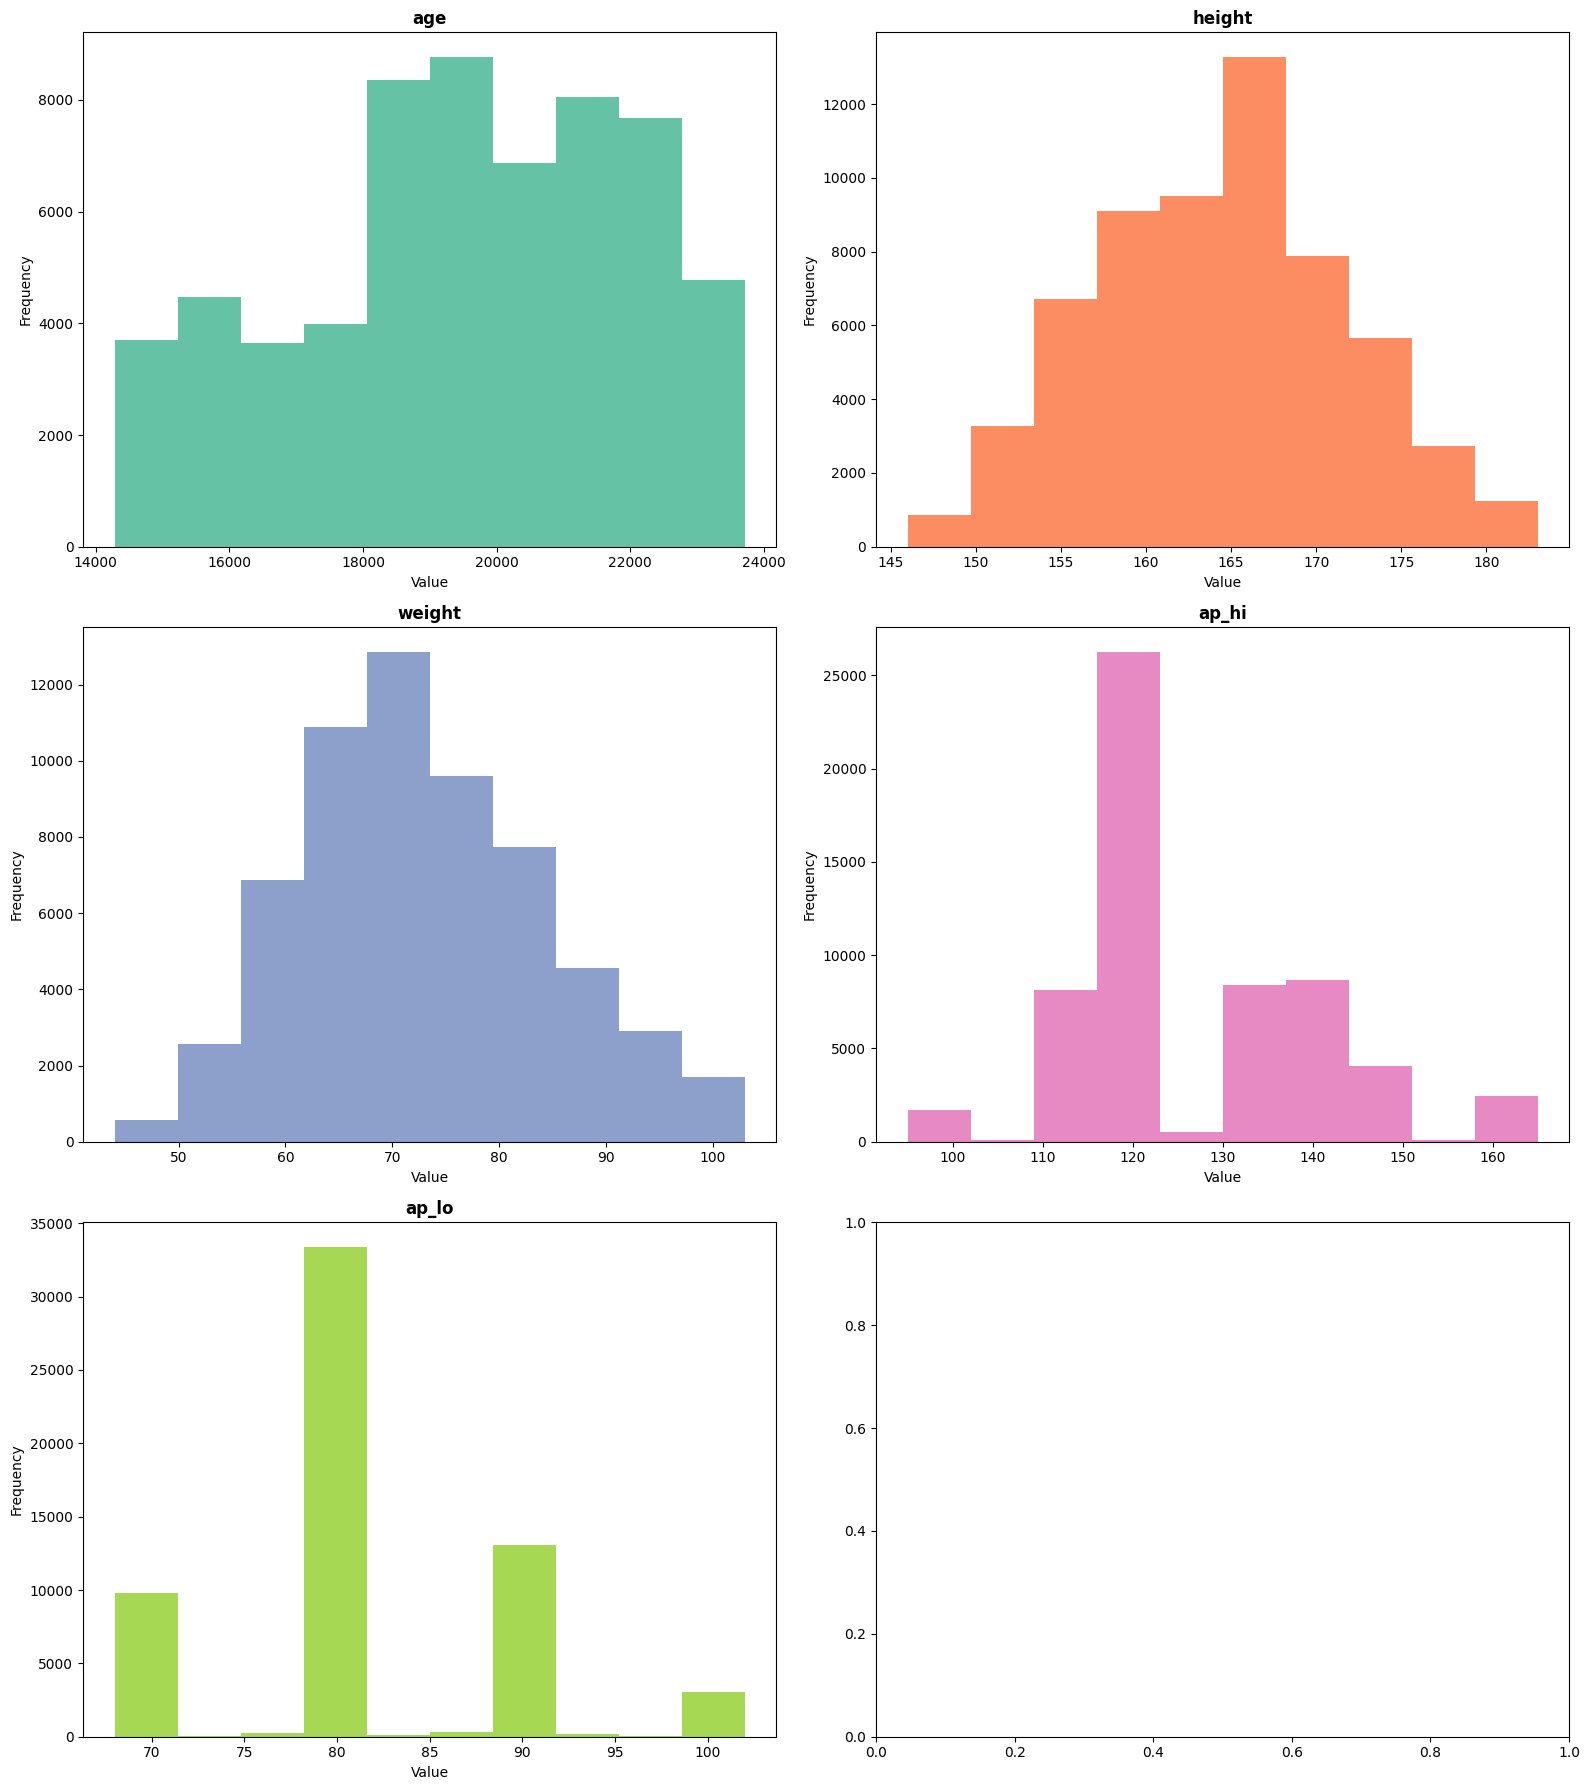

In [48]:
import matplotlib.pyplot as plt
from math import ceil


rows = ceil(numerical.shape[1] / 2)

# Crear los subplots
f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(16, rows * 6))

# Aplanar el array de ejes para facilitar el acceso
ax = ax.flat

# Definir una paleta de colores
colors = plt.get_cmap('Set2').colors

# Crear histogramas para cada columna
for i, column in enumerate(numerical.columns):
    df[column].plot.hist(ax=ax[i], color=colors[i % len(colors)])
    ax[i].set_title(column, fontsize=12, fontweight="bold")
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Frequency')

# Ajustar el diseño
plt.tight_layout()
plt.show()


Ademas del analisis anterioemente con los histogramas podemos ver la frecuencia que siguen las variables numericas donde la mayoria parece tener una sola moda, a excepcion de la variable edad que parece estar totalmente sesgada hacia la derecha, lo cual significa que hay mucha mas cantidad de personas con mayor edad en este estudio que los que tiene menor edad, ademas como se esperaba de los demas datos siguen una distribucion similar a una normal.

## Patterns

In [49]:
df['cardio'].value_counts(normalize = True) * 100

cardio
0    50.997794
1    49.002206
Name: proportion, dtype: float64

hay casi igual de cantidad de personas que estan enfermas cardiovascularmente como las que no, esto es bueno para hacer un buen modelo ya que no tendra problemas de sesgo.

<Axes: xlabel='cholesterol'>

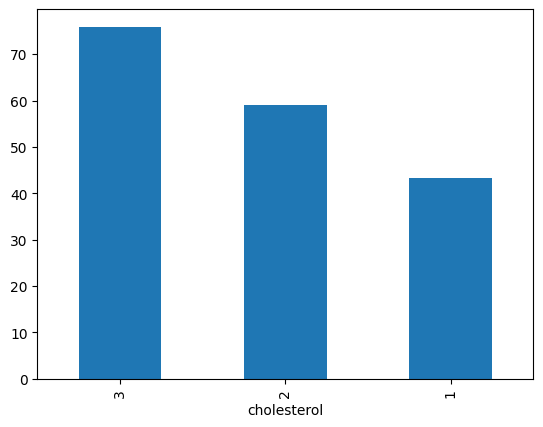

In [50]:
temp = df.groupby('cholesterol').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='gluc'>

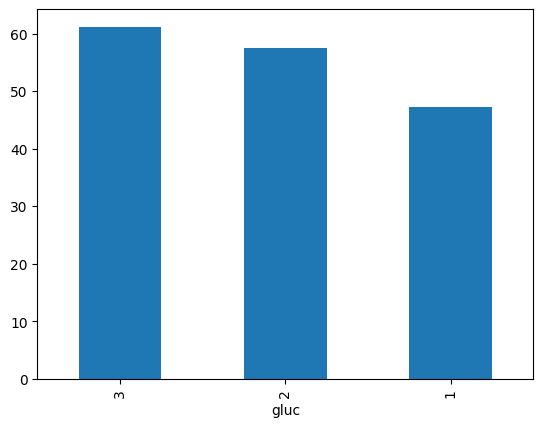

In [51]:
temp = df.groupby('gluc').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='gender'>

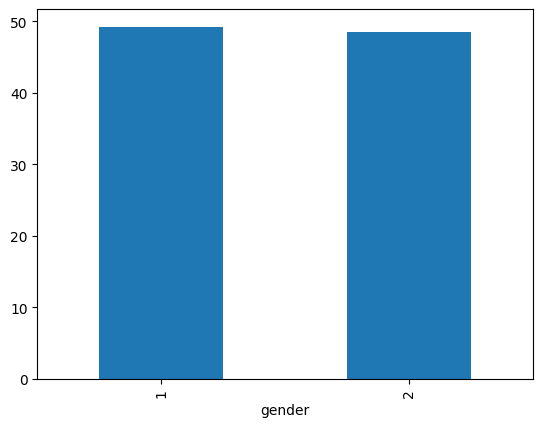

In [52]:
temp = df.groupby('gender').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='smoke'>

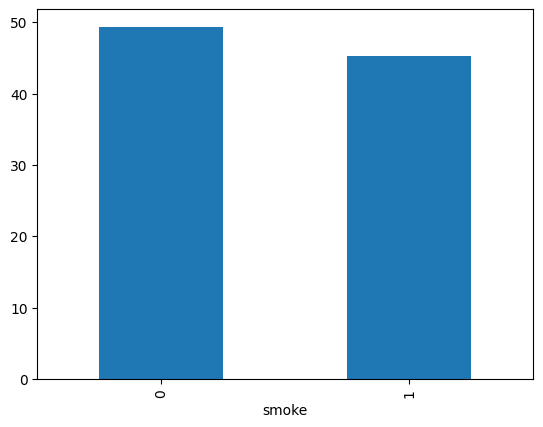

In [53]:
temp = df.groupby('smoke').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='alco'>

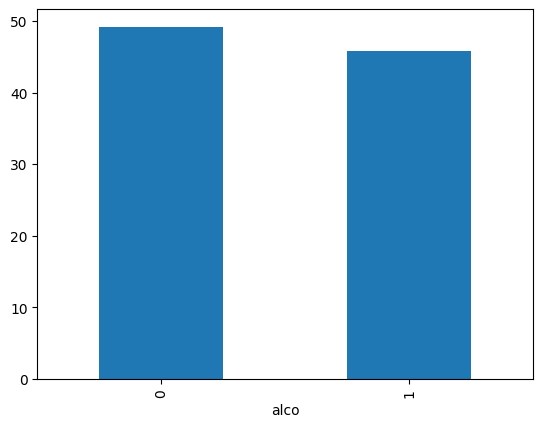

In [54]:
temp = df.groupby('alco').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='active'>

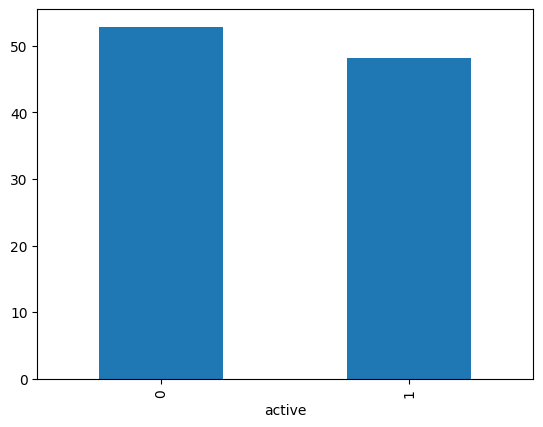

In [55]:
temp = df.groupby('active').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

hay un patron en la gente que tiene enfermedades cardivasculares, cosas que pueden afectar mas que otras por ejemplo las siguientes:

tener un alto nivel de colesterol te hace ser mas propenso a tener enfermedades cardiovasculares, con un 75%

tambien tener un alto nivel de glucosa, alrededor del 60% de la gente que tiene la glucosa alta tiene enfermedades cardiovasculares.

no hay mucha diferencia en tener enfermedades cardiovasculares entre hombres y mujeres aunque hay una ligera diferencia por parte de mujeres, es decir las mujeres tienen un leve aumento en la probabilidad de tener la enfermedad

no hay mucha diferencia para la gente que fuma y bebe tienen una pequeña mayor diferencia de poder tener enfermedades cardiovasculares vs los que no

y finalmente lo mas importante para nuestro estudio parece ser que, las personas que son mas activas tienen una mucha menor probabilidad de contener enfermedades cardiovasculares